In [18]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns
df=pd.read_excel("C:/7-clustering/EastWestAirlines.xlsx")
print(df)

       ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_m

In [19]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [3]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

<Axes: >

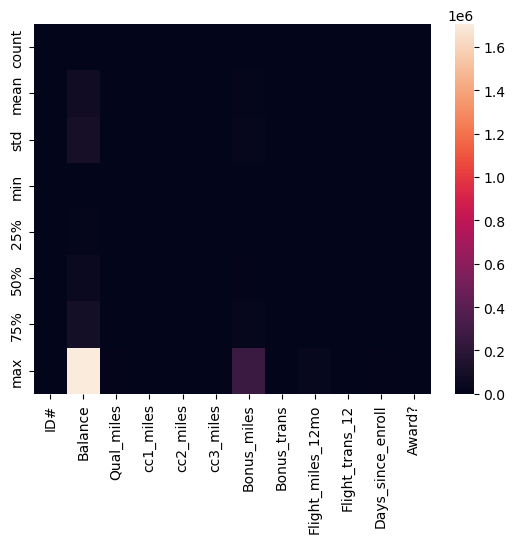

In [4]:
sns.heatmap(df.describe())

C:\Users\SAINATH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SAINATH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\SAINATH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\SAINATH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na op

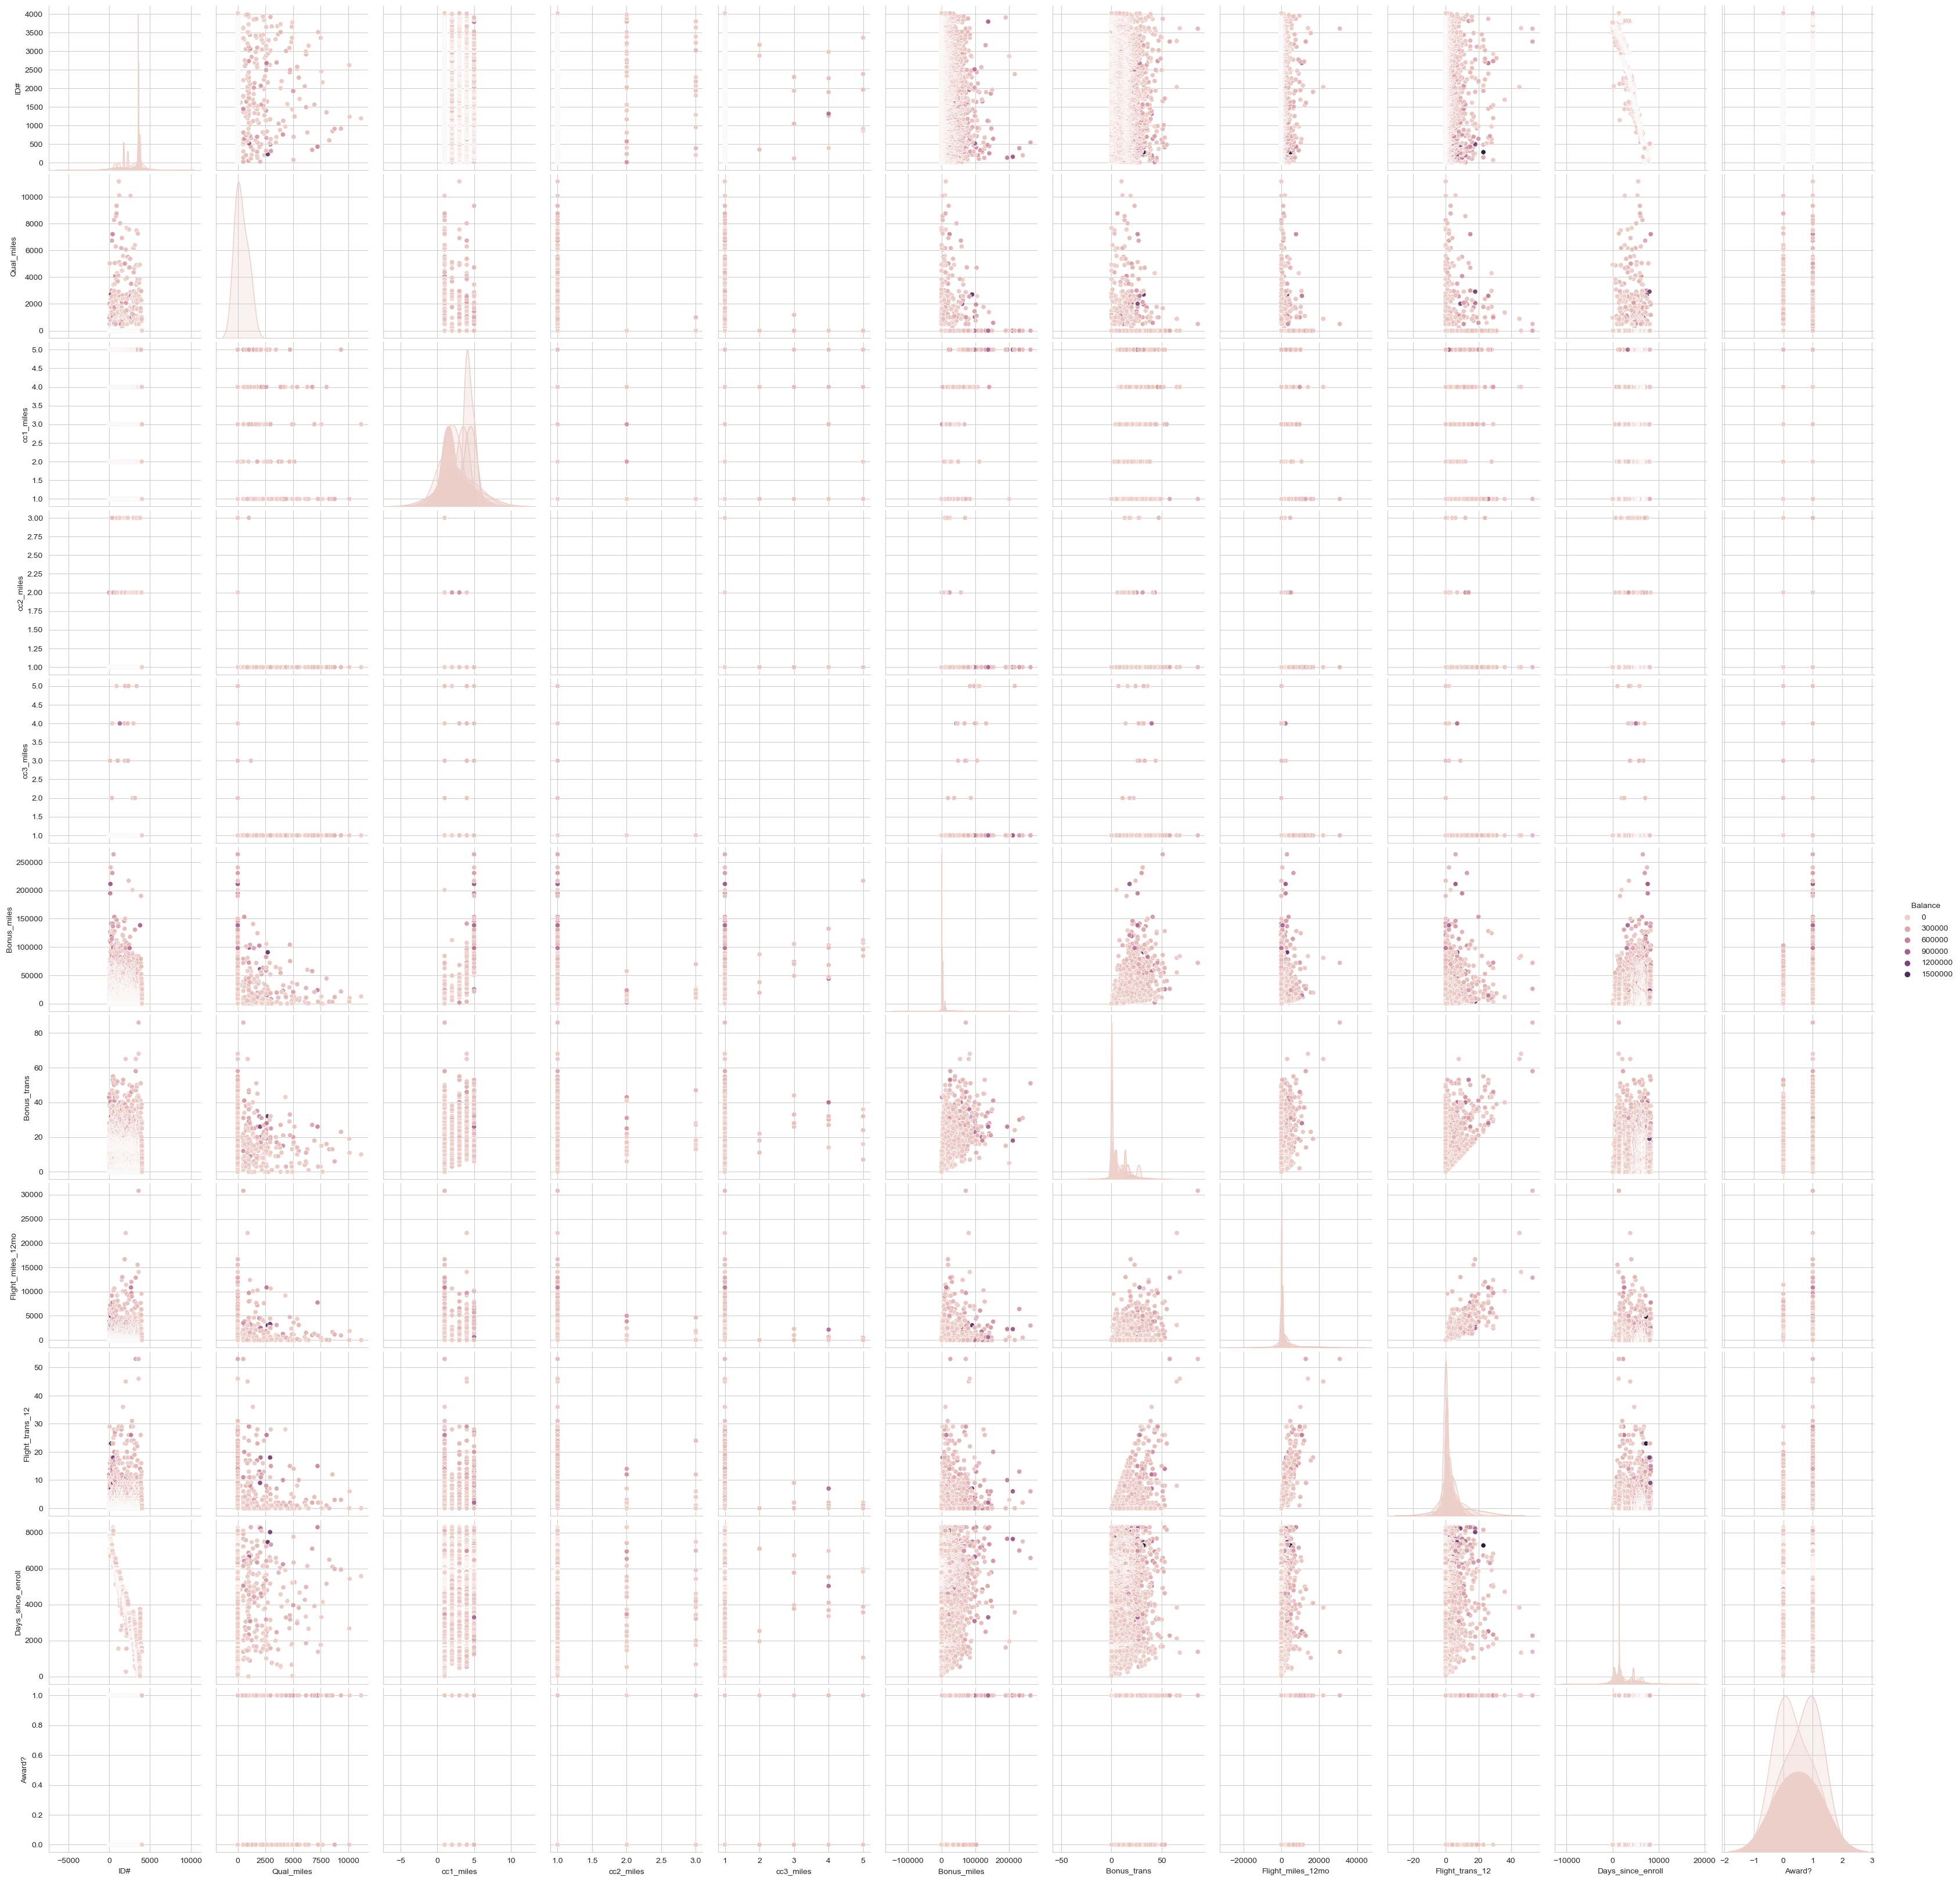

In [6]:
sns.set_style('whitegrid');
sns.pairplot(df,hue='Balance',height=3);
plt.show()

In [20]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch


In [21]:
def norm_func(df):
    scaler = MinMaxScaler()
    df_norm = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return df_norm

In [22]:
df_norm=norm_func(df.iloc[:,1:])
b=df_norm.describe()

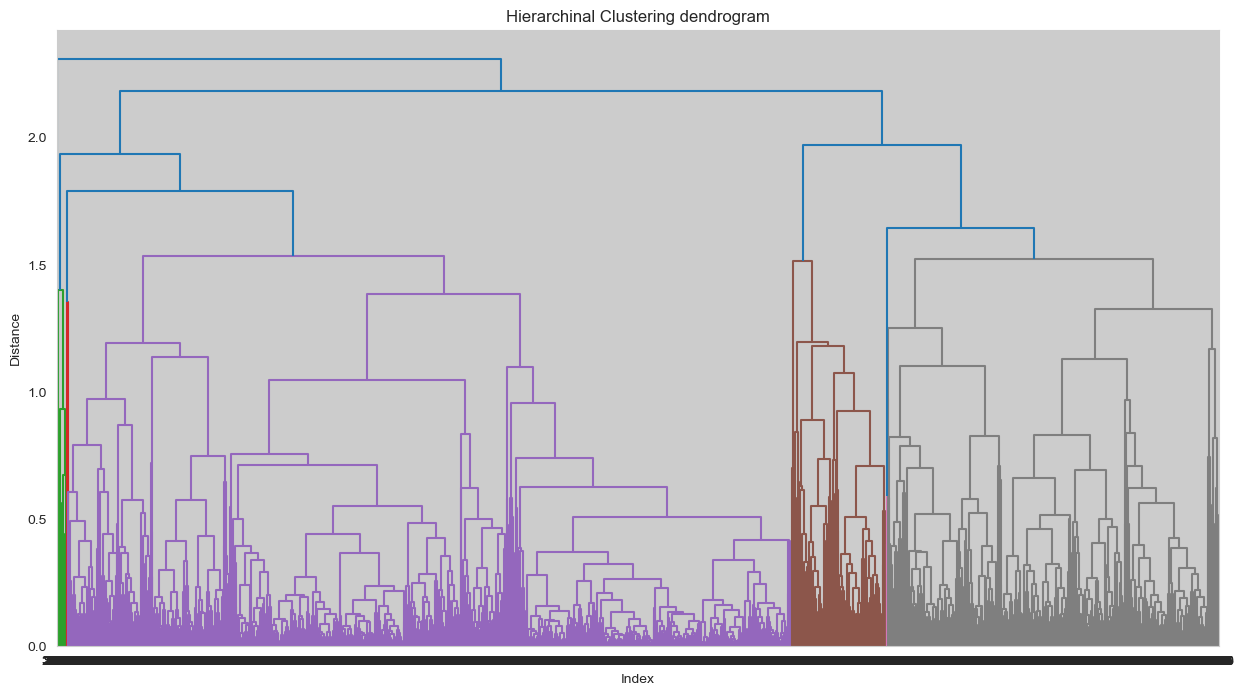

In [24]:
z=linkage(df_norm,method='complete',metric='euclidean')
plt.figure(figsize=(15,8));
plt.title("Hierarchinal Clustering dendrogram");
plt.xlabel("Index");
plt.ylabel("Distance")
# ref help of dendrogram sch.dendrogram(z)
sch.dendrogram(z,leaf_rotation=0,leaf_font_size=10)
plt.show()

In [25]:
from sklearn.cluster import AgglomerativeClustering
h_complete=AgglomerativeClustering(n_clusters=3,linkage="complete",metric="euclidean").fit(df_norm)

In [27]:
h_complete.labels_
cluster_labels=pd.Series(h_complete.labels_)



array([0, 0, 0, ..., 0, 0, 0])

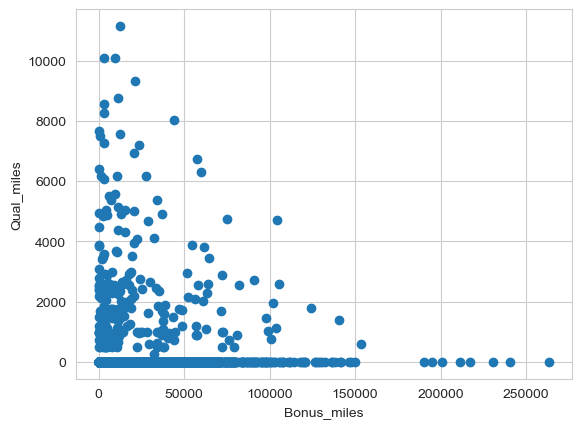

In [28]:
plt.scatter(df.Bonus_miles,df["Qual_miles"])
plt.xlabel('Bonus_miles')
plt.ylabel("Qual_miles")
# creating a cluster after visualizing the plot 
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[["Bonus_miles","Qual_miles"]])
y_predicted

In [29]:
# Creating a new column for the clusters
df['cluster']=y_predicted
df.head()
km.cluster_centers_ # marks each cluster centers

array([[  6602.78483073,    138.87858073],
       [ 45210.88157895,    150.95574163],
       [115188.87912088,    258.02197802]])

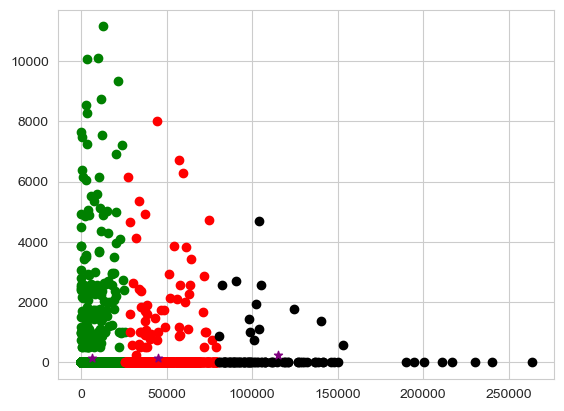

In [30]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.Bonus_miles,df1["Qual_miles"],color='green')
plt.scatter(df2.Bonus_miles,df2["Qual_miles"],color='red')
plt.scatter(df3.Bonus_miles,df3['Qual_miles'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="purple",marker="*",label="centroid")

array([[  6490.97184021,    138.58120498],
       [108500.99099099,    222.63963964],
       [ 43999.04316547,    153.92565947]])

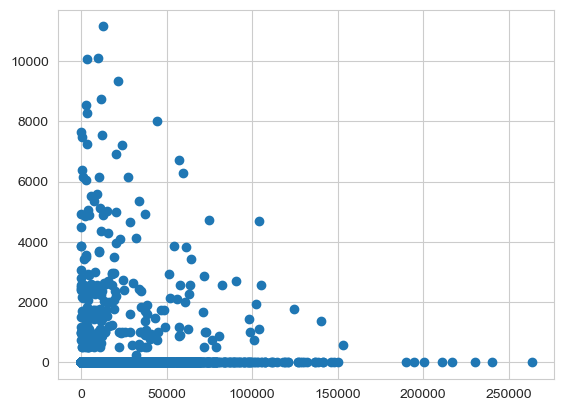

In [31]:
plt.scatter(df.Bonus_miles,df["Qual_miles"])
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[["Bonus_miles","Qual_miles"]])
y_predicted

df['cluster']=y_predicted
df.head()
km.cluster_centers_

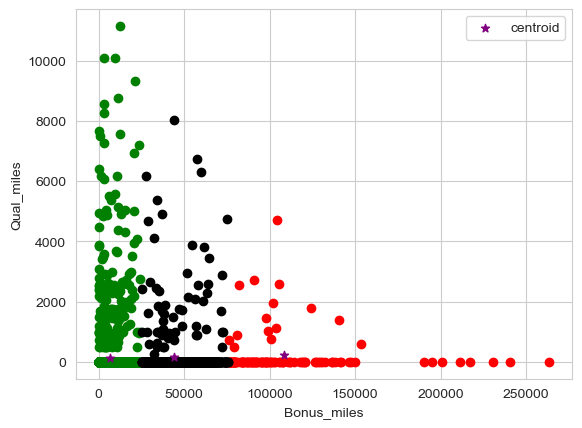

In [32]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.Bonus_miles,df1["Qual_miles"],color='green')
plt.scatter(df2.Bonus_miles,df2["Qual_miles"],color='red')
plt.scatter(df3.Bonus_miles,df3['Qual_miles'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="purple",marker="*",label="centroid")
# Non uniform cluster
plt.xlabel('Bonus_miles')
plt.ylabel("Qual_miles")
plt.legend()

In [33]:
scaler=MinMaxScaler()

scaler.fit(df[['Qual_miles']])
df["Qual_miles"]=scaler.transform(df[["Qual_miles"]])
scaler.fit(df[['Qual_miles']])

# Refit the scaler with the 'Murder' column
df["Bonus_miles"] = scaler.fit_transform(df[["Bonus_miles"]])
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0.0,1,1,1,0.000660,1,0,0,7000,0,0
1,2,19244,0.0,1,1,1,0.000815,2,0,0,6968,0,0
2,3,41354,0.0,1,1,1,0.015636,4,0,0,7034,0,0
3,4,14776,0.0,1,1,1,0.001896,1,0,0,6952,0,0
4,5,97752,0.0,4,1,1,0.164211,26,2077,4,6935,1,2


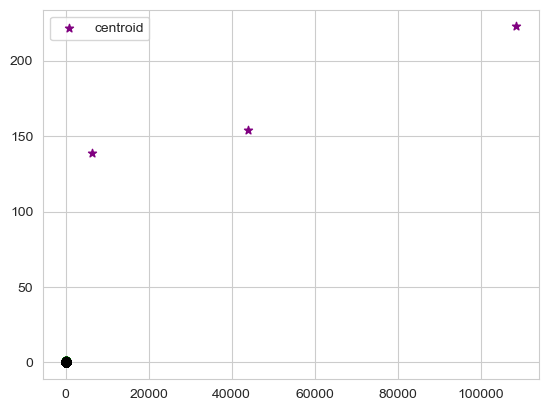

In [34]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.Bonus_miles,df1["Qual_miles"],color='green')
plt.scatter(df2.Bonus_miles,df2["Qual_miles"],color='red')
plt.scatter(df3.Bonus_miles,df3['Qual_miles'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="purple",marker="*",label="centroid")
# Uniform cluster
plt.legend()